# Intro to Regression with Neural Networks in TensorFlow

Predicting a numerical variable based on some other combination of numbers

In [1]:
# Import TF
import tensorflow as tf
print(tf.__version__)

2.4.1


## Creating data to view and fit

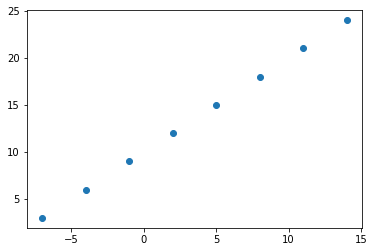

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for the housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X[0].ndim

0

In [7]:
# Turn numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in modelling with TF

1. **Creating a model** - define input and output layers, as well as hidden layers
2. **Compiling a model** - define the loss functions which tells the model how wrong it is and the optimizer who tells the model how to improve the patterns its 
learning and evaluation metrics which interprets the performance of the model
3. **Fitting a model** - let the model try to find patterns between X and y (features and labels)

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolut error
              optimizer=tf.keras.optimizers.SGD(),  #sthocastic gradient descent
              metrics=['mae'])

# 3. Fitting the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
# try to make a prediction
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [11]:
y_pred + 11

array([[23.71602]], dtype=float32)

# Improve our model

By altering the steps:

1. Creation: add more layers, increase neurons, change activation function in each layer

2. Compiling: change optimization function or learning rate of optimization function

3. Fitting: fit the model for more epochs or bring more examples of data

In [12]:
# Lets rebuild the model

# 1. Create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fitting the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 267ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [15]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,  #"mae"
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=['mae']
              )
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 402ms/step - loss: 12.1311 - mae: 12.1311
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4377 - mae: 7.4377
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 4.0332 - mae: 4.0332
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 6.1714 - mae: 6.1714
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 5.2233 - mae: 5.2233
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 3.6594 - mae: 3.6594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 3.4328 - mae: 3.4328
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 3.0845 - mae: 3.0845
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 3.1236 - mae: 3.1236
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 3.0097 - mae: 3.0097
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 2.3

In [16]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
model.predict([17.0])

array([[26.3845]], dtype=float32)

## Evaluating a model

Build a model, compile it, fit it, evaluate it, tweak it (adjusting hyperparameters)...fit it, evaluate it, tweak it...fit it, evaluate it, tweak it

Visualize....visualize...visualize:
- the data
- the model
- the training
- the predictions

In [18]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for the dataset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

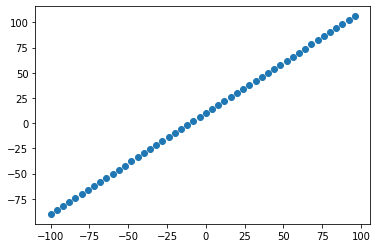

In [20]:
# Visalize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* Training set - model learns from this set
* Validation set - the model gets tuned on this set
* Test set - the model gets evaluated on this set 

In [21]:
# Check the lenght of the samples
len(X)

50

In [22]:
# Split the data into train and test sets
X_train = X[:40] # first 40 sample
y_train = y[:40] 

X_test = X[40:] # first 40 sample
y_test = y[40:] 

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing data training and test sets

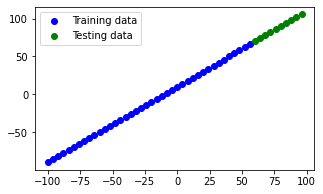

In [23]:
plt.figure(figsize=(5,3))

plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")

plt.legend();

In [24]:
# let's have a look at build a NN

model =tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# model.fit(X_train, y_train, epochs=100)

In [26]:
model.summary()  # visualize

ValueError: ignored

In [27]:
# let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

model =tf.keras.Sequential([
      tf.keras.layers.Dense(1, input_shape=[1])
])
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# model.fit(X_train, y_train, epochs=100)

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params: number of parameters in the model
* Trainable params: params the model can update as it trains
* Non-trainable: typical when you bring in already learned patterns from transfer learning)

Resource: check MITs introduction to deep learning videos

In [29]:
# changing the neurons to 3
tf.random.set_seed(42)

model =tf.keras.Sequential([
      tf.keras.layers.Dense(3, input_shape=[1])
])
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 42.0509 - mae: 42.0509
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 30.8796 - mae: 30.8796
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 20.5160 - mae: 20.5160
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.4820 - mae: 13.4820
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 8.7460 - mae: 8.7460
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 7.8322 - mae: 7.8322
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.2988 - mae: 8.2988
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 7.9818 - mae: 7.9818
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5970 - mae: 8.5970
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 8.2904 - mae: 8.2904
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss

In [30]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Fit model to training data set

model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 8.2275 - mae: 8.2275
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 7.2974 - mae: 7.2974
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 8.0786 - mae: 8.0786
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.4440 - mae: 7.4440
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 8.2829 - mae: 8.2829
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 7.3125 - mae: 7.3125
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 7.9052 - mae: 7.9052
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 7.3708 - mae: 7.3708
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 8.4514 - mae: 8.4514
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 8.2778 - mae: 8.2778
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 7.5319 

In [32]:
tf.random.set_seed(42)

model =tf.keras.Sequential([
      tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
      tf.keras.layers.Dense(1, name="output_layer")
], name="good_model")
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# model.fit(X_train, y_train, epochs=100, verbose=0)

In [33]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [34]:
model.summary()

Model: "good_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


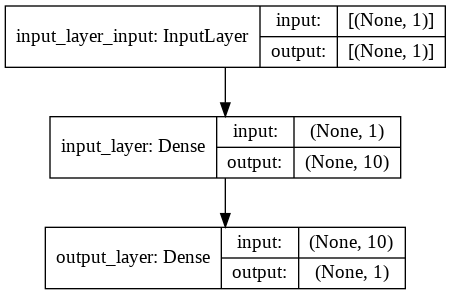

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing model predictions

Plot them against the ground truth labels, often as y_test or y_true versus y_pred

In [36]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred

array([[ 70.55221 ],
       [ 75.13992 ],
       [ 79.72765 ],
       [ 84.31538 ],
       [ 88.9031  ],
       [ 93.49082 ],
       [ 98.07855 ],
       [102.666275],
       [107.254005],
       [111.84173 ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Note: if reusing some functionality in the future, is a good idea to turn it into a function

In [38]:
# Create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred
                     ):
  '''
  Plots training data , test data and compares preds vs ground truth
  '''
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="training data")
  plt.scatter(test_data, test_labels, c="g", label="testing data")
  plt.scatter(test_data, predictions, c="r", label="predictions")
  plt.legend();

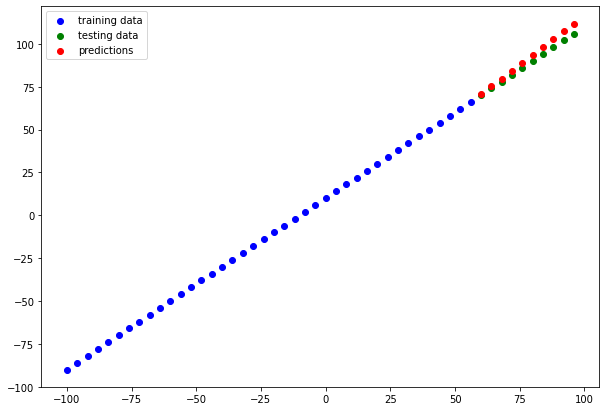

In [39]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)
# plot_predictions()    - this is the same as above

### Evaluating models preds with regression evaluation metrics

Depending on the problem there are different evaluation metrics. For regression MAE (starter metric), MSE (when larger errors are more significant then smaller ones) and Huber (combination of MAE and MSE. Less sensitive to outliers than MSE)

In [40]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 124ms/step - loss: 3.1970 - mae: 3.1970


[3.1969642639160156, 3.1969642639160156]

In [41]:
# Calculate MAE
mae = tf.keras.losses.MAE(y_true = y_test, 
                          y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558233, 14.116046, 11.708939, 10.336925, 10.      , 10.698164,
       12.447131, 15.33302 , 19.254005, 23.841728], dtype=float32)>

In [42]:
y_pred

array([[ 70.55221 ],
       [ 75.13992 ],
       [ 79.72765 ],
       [ 84.31538 ],
       [ 88.9031  ],
       [ 93.49082 ],
       [ 98.07855 ],
       [102.666275],
       [107.254005],
       [111.84173 ]], dtype=float32)

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [44]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55221 ],
       [ 75.13992 ],
       [ 79.72765 ],
       [ 84.31538 ],
       [ 88.9031  ],
       [ 93.49082 ],
       [ 98.07855 ],
       [102.666275],
       [107.254005],
       [111.84173 ]], dtype=float32)>

In [45]:
# They have a different shape when compared as tensors
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55221 ,  75.13992 ,  79.72765 ,  84.31538 ,  88.9031  ,
        93.49082 ,  98.07855 , 102.666275, 107.254005, 111.84173 ],
      dtype=float32)>

In [46]:
mae = tf.keras.losses.MAE(y_true = y_test, 
                          y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969643>

In [47]:
# Calculate the MSE
mse = tf.keras.losses.MSE(y_true = y_test, 
                          y_pred = tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=13.0703>

In [48]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true = y_true,    # same expressions as above
                             y_pred = tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true = y_true,
                             y_pred = tf.squeeze(y_pred))

### Running experiments to improve the model

Build, fit, evaluate, tweak...fit, evaluate, tweak...fit, evaluate, tweak

1. More data or more examples to learn patterns and relationships between features and labels

2. Make model larger, more layers or more hidden units

3. Train for longer, so it has more chance to find patterns in data

Three modelling experiments:

1. model1, same as original, 1 layer, 100 epochs
2. model2, 2 layers, 100 epochs
3. model3, 2 layers, 500 epochs

In [49]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [50]:
# Set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss

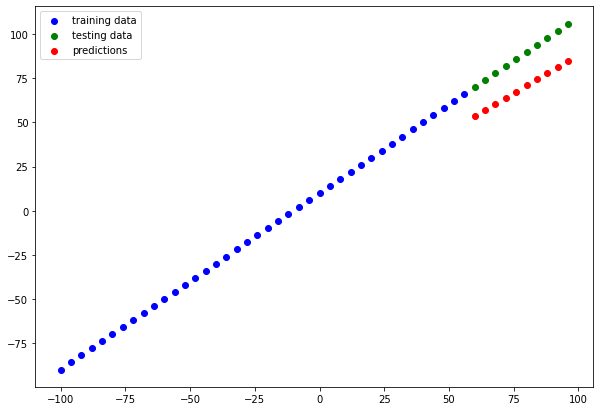

In [51]:
# make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [52]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

In [53]:
# model_2 
# Set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation='relu'),                         
      tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 39.0788 - mae: 39.0788
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9383 - mae: 14.9383
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7671 - mae: 10.7671
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1174 - mae: 8.1174
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 8.9726 - mae: 8.9726
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0027 - mae: 9.0027
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2701 - mae: 11.2701
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 14.5040 - mae: 14.5040
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 23.5506 - mae: 23.5506
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 11.5859 - mae: 11.5859
Epoch 11/100
2/2 [==============================] - 0s 6ms/step -

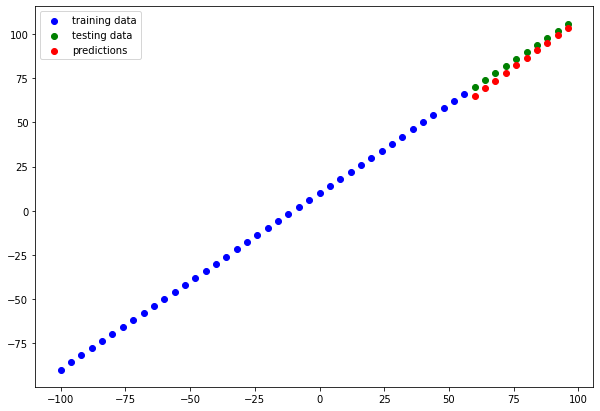

In [54]:
# make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [55]:
# calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.5793526>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.517387>)

In [56]:
# model_3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_3.fit(X_train, y_train, epochs= 500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 36.1357 - mse: 1790.5920
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 28.6832 - mse: 1071.8060
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 35.1592 - mse: 1806.4852
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 31.1747 - mse: 1441.6995
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 15.3029 - mse: 301.4039
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 12.4819 - mse: 195.6678
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.5700 - mse: 157.7617
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 11.6741 - mse: 192.9650
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 44.5520 - mse: 3088.6756
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 30.1897 - mse: 1284.1386
Epoch 11/500
2/2 [=========================

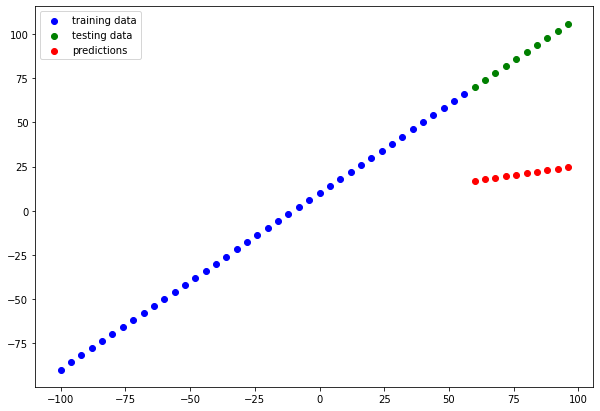

In [57]:
# make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [58]:
# calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.21916>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4601.0547>)

### Comparing the results of the experiments

Start with small experiments (small models) and make sure they work and then increase their scale when neccessary

In [59]:
# Let's compare model results using Pandas dataframe
import pandas as pd

model_results = [['model_1',mae_1,mse_1],
                 ['model_2',mae_2,mse_2],
                 ['model_3',mae_3,mse_3]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,"tf.Tensor(18.745327, shape=(), dtype=float32)","tf.Tensor(353.5734, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(3.5793526, shape=(), dtype=float32)","tf.Tensor(13.517387, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(67.21916, shape=(), dtype=float32)","tf.Tensor(4601.0547, shape=(), dtype=float32)"


In [60]:
import pandas as pd

model_results = [['model_1',mae_1.numpy(),mse_1.numpy()],
                 ['model_2',mae_2.numpy(),mse_2.numpy()],
                 ['model_3',mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.579353,13.517387
2,model_3,67.219162,4601.054688


In [61]:
model_2.summary()  # better one so far

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Note: minimize the time between experiements. The more exeriments then helps to figure out what works....experiment....experiment...

## Tracking experiments

There are tools to help:

* TensorBoard, from TF library
* Weights & Biases, plugs into TensorBoard

## Saving the models

To use outside of Colab or wherever they are trained, such as in a web app or mobile app

Main formats:
* SavedModel format
* HDF5 format

In [62]:
# SavedModel format
model_2.save("best_model_SavedModel")

INFO:tensorflow:Assets written to: best_model_SavedModel/assets


In [63]:
# Save in HDF5 format
model_2.save("best_model_HDF5.h5")

In [64]:
## Loading saved models

loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compare predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [66]:
# Loading with .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compare predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downloading a model

1. Regular
2. Use code
3. Save to Google Drive - Mount Drive icon

In [68]:
# Download a file
from google.colab import files
files.download('/content/best_model_HDF5.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
# From Colab to Google Drive
!cp /content/best_model_HDF5.h5 /content/drive/MyDrive/tf_course

In [70]:
!ls /content/drive/MyDrive/tf_course

best_model_HDF5.h5


In [71]:
## A larger example - Insurance Dataset Regression

In [72]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# Read in the insurance dataset from Kaggle
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [74]:
# First step: strings conversion to numerical encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [75]:
# Create X and y values (features and labels)
# Create training and test sets
# Build a neural network (similar to model_2)

In [76]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [77]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [78]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [79]:
# Create training and test sets (from scikit learn)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test) 

(1338, 1070, 268)

In [80]:
# Build a neural network (similar to model_2)
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7718.1918 - mae: 7718.1918
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 6983.7826 - mae: 6983.7826
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 8083.4823 - mae: 8083.4823
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7618.4114 - mae: 7618.4114
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7678.4979 - mae: 7678.4979
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7780.4296 - mae: 7780.4296
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7588.8135 - mae: 7588.8135
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7520.6833 - mae: 7520.68

In [81]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3281 - mae: 7023.3281


[7023.328125, 7023.328125]

In [82]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Our model is not performing, improve it

In [83]:
# Experiment: adding an extra layer and changing optimizer
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [84]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test) 

9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [85]:
# Experiment: more epochs
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                    tf.keras.layers.Dense(100),
                    tf.keras.layers.Dense(10),
                    tf.keras.layers.Dense(1)
]) 

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs= 200, verbose=2)

Epoch 1/200
34/34 - 0s - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 - 0s - loss: 13104.4287 - mae: 13104.4287
Epoch 3/200
34/34 - 0s - loss: 12749.5400 - mae: 12749.5400
Epoch 4/200
34/34 - 0s - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 - 0s - loss: 10905.8135 - mae: 10905.8135
Epoch 6/200
34/34 - 0s - loss: 9457.7188 - mae: 9457.7188
Epoch 7/200
34/34 - 0s - loss: 8147.6533 - mae: 8147.6533
Epoch 8/200
34/34 - 0s - loss: 7528.8398 - mae: 7528.8398
Epoch 9/200
34/34 - 0s - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 - 0s - loss: 7409.0811 - mae: 7409.0811
Epoch 11/200
34/34 - 0s - loss: 7390.8042 - mae: 7390.8042
Epoch 12/200
34/34 - 0s - loss: 7368.9170 - mae: 7368.9170
Epoch 13/200
34/34 - 0s - loss: 7348.5195 - mae: 7348.5195
Epoch 14/200
34/34 - 0s - loss: 7326.4893 - mae: 7326.4893
Epoch 15/200
34/34 - 0s - loss: 7307.5811 - mae: 7307.5811
Epoch 16/200
34/34 - 0s - loss: 7285.7734 - mae: 7285.7734
Epoch 17/200
34/34 - 0s - loss: 7265.7100 - mae: 7265.7

In [86]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3494.5325 - mae: 3494.5325


[3494.532470703125, 3494.532470703125]

Text(0.5, 0, 'epochs')

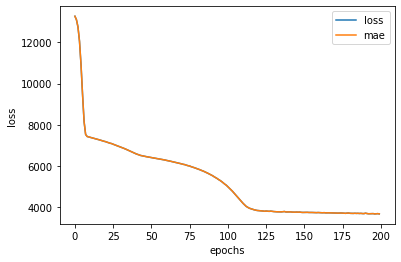

In [87]:
# Plot history (same as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#### How long should the model keep learning? It depends...and TF has Early Stopping Callback to stop training once stops improving

# Preprocessing data (normalization and standardization)

1. Turn all data into numbers (NN can't handle strings)
2. Make sure all tensors are the right shape
3. Scale features (normalize or standardize. NN tend to prefer normalization)

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read insurance dataframe (reinstantiate to ensure is fresh)
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [88]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


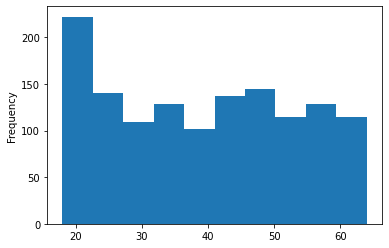

In [89]:
X["age"].plot(kind='hist')

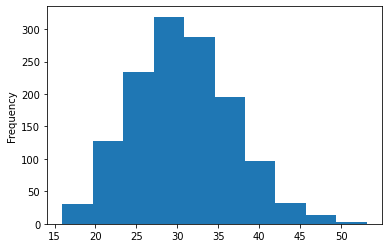

In [90]:
X['bmi'].plot(kind='hist')

In [92]:
X['children'].value.counts()

AttributeError: ignored

### Notes: Feature Scaling

1. Scale - Converts values between 0 and 1 - Scikit Learn: MinMaxScaler - Default scaler for NN 
2. Standardization - Removes the mean and divides each value by stddev - Scikit Learn: StandardScaler - transform a feature to have close to normal distribution (it reduces effect of outliers)

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read insurance dataframe (reinstantiate to ensure is fresh)
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [99]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age",'bmi',"children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]), 
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxscaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [100]:
# What does the data looks like?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [102]:
X_train_normal[21]  # sample data after normalization

array([0.15217391, 0.52905569, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [103]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [104]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Data has been normalized and one hot encoded

In [108]:
insurance_model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [110]:
# Build a NN model to fit on our normalized data

tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
              tf.keras.layers.Dense(100),
              tf.keras.layers.Dense(10),
              tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13296.4687 - mae: 13296.4687
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12948.4238 - mae: 12948.4238
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12705.2199 - mae: 12705.2199
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13230.8565 - mae: 13230.8565
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12995.1988 - mae: 12995.1988
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12876.1058 - mae: 12876.1058
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12304.99

In [111]:
# Evaluate insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [112]:
# Insurance model 2 results to compare against
# 9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107

## NORMALIZING PERFORMS BETTER!!!